In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!python --version

# Version des bibliothèques utilisées
print('\n'.join(f'{m.__name__} - {m.__version__}' 
                for m in globals().values() 
                if getattr(m, '__version__', None)))


Python 3.11.5
pandas - 2.0.3
numpy - 1.23.5
seaborn - 0.12.2


In [3]:
# Importation de la base de données
columns = ['target','id','Date','Origine','Name','text']
df =  pd.read_csv('training.csv', encoding="ISO-8859-1",names=columns)
df

,target,id,Date,Origine,Name,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   target   1600000 non-null  int64 
 1   id       1600000 non-null  int64 
 2   Date     1600000 non-null  object
 3   Origine  1600000 non-null  object
 4   Name     1600000 non-null  object
 5   text     1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df.isnull().sum()

target     0
id         0
Date       0
Origine    0
Name       0
text       0
dtype: int64

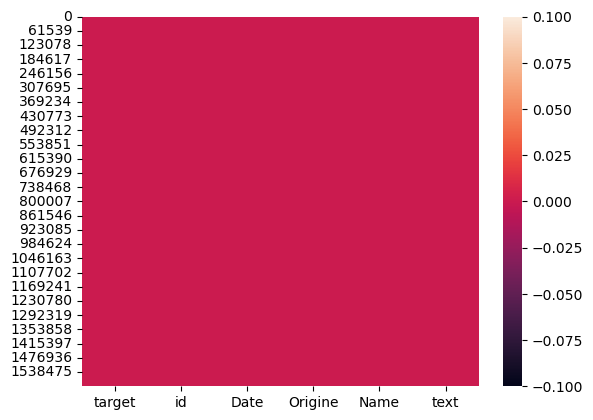

In [6]:
sns.heatmap(df.isnull());

In [7]:
df = df[['target','text']].reset_index()
df

,index,target,text
0,0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,0,is upset that he can't update his Facebook by ...
2,2,0,@Kenichan I dived many times for the ball. Man...
3,3,0,my whole body feels itchy and like its on fire
4,4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
1599995,1599995,4,Just woke up. Having no school is the best fee...
1599996,1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
df.target.unique()

array([0, 4], dtype=int64)

In [9]:
df.loc[df['target'] == 4, 'target'] = 1
df.target.unique()

array([0, 1], dtype=int64)

In [10]:
df['target'].sample(20)

1491814    1
248262     0
607546     0
372513     0
963093     1
1358946    1
509561     0
564715     0
268887     0
838610     1
600452     0
579785     0
848961     1
24952      0
301342     0
141568     0
242994     0
1449551    1
1357158    1
1167228    1
Name: target, dtype: int64

In [11]:
category_count = df['target'].value_counts()
category_count

target
0    800000
1    800000
Name: count, dtype: int64

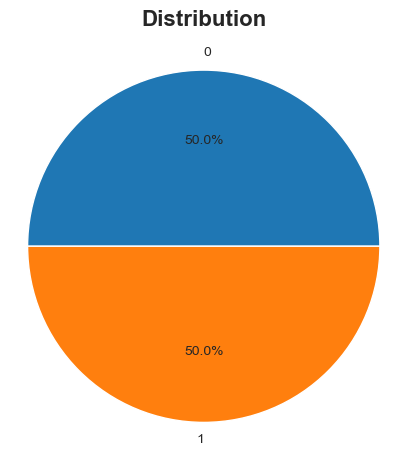

In [12]:
# La distribution par categorie
plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
plt.pie(category_count, labels=category_count.index, autopct='%1.1f%%')
plt.title('Distribution',  fontsize=16, fontweight='bold', pad=20)
plt.axis('equal') 
plt.show()

### La distribution est pafaitement équilibrée

In [13]:
# Sélectionner aléatoirement 10 000 tweets positifs
tweets_positifs = df[df['target'] == 1].sample(n=10000, random_state=42, replace=True )

# Sélectionner aléatoirement 10 000 tweets négatifs
tweets_negatifs = df[df['target'] == 0].sample(n=10000, random_state=42, replace=True)

# Concaténer les tweets positifs et négatifs sélectionnés
df_select = pd.concat([tweets_positifs, tweets_negatifs])

# Réinitialiser les index
df_select = df_select.reset_index(drop=True)
df_select


,index,target,text
0,921958,1,"@V_J I haven't been sleeping well this wk, had..."
1,1471155,1,okay off to sleep now
2,931932,1,@ashlili LIKE MEEEEEEEEE
3,1165838,1,@Eva_Abreu Maybe we're bored..lol..I got plent...
4,1059178,1,yay for atwin who had her baby boy Matthew Joh...
...,...,...,...
19995,63888,0,sick from last night D: sore throat and a bitt...
19996,585581,0,@devilgossip everything is picked over.
19997,213596,0,@alyssabuonagura josh's party. I was stupid an...
19998,68515,0,@MixedByAli thats dope..yea im bout to hit the...


In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

nltk.download('stopwords')
nltk.download('punkt')


def clean_text(text):
    # Suppression des caractères spéciaux et de la ponctuation
    text = re.sub(r"[^\w\s]", "", text)
    
    # Conversion en minuscules
    text = text.lower()
    
    # Tokenisation du texte
    tokens = word_tokenize(text)
    
    # Suppression des mots vides
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Joindre les tokens en une seule chaîne
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


# Appliquer le nettoyage du texte sur la colonne 'texte'
df_select['text_clean'] = df_select['text'].apply(clean_text)

df_select

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,index,target,text,text_clean
0,921958,1,"@V_J I haven't been sleeping well this wk, had...",v_j havent sleeping well wk gig fri nite amp w...
1,1471155,1,okay off to sleep now,okay sleep
2,931932,1,@ashlili LIKE MEEEEEEEEE,ashlili like meeeeeeeee
3,1165838,1,@Eva_Abreu Maybe we're bored..lol..I got plent...,eva_abreu maybe boredloli got plenty sleep fel...
4,1059178,1,yay for atwin who had her baby boy Matthew Joh...,yay atwin baby boy matthew john last night 8 l...
...,...,...,...,...
19995,63888,0,sick from last night D: sore throat and a bitt...,sick last night sore throat bitt congested fri...
19996,585581,0,@devilgossip everything is picked over.,devilgossip everything picked
19997,213596,0,@alyssabuonagura josh's party. I was stupid an...,alyssabuonagura joshs party stupid left table ...
19998,68515,0,@MixedByAli thats dope..yea im bout to hit the...,mixedbyali thats dopeyea im bout hit sheetswork


In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import re, nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
def cleaned_text(text):
    clean = re.sub("\n"," ",text)
    clean=clean.lower()
    clean=re.sub(r"[~.,%/:;?_&+*=!-]"," ",clean)
    clean=re.sub("[^a-z]"," ",clean)
    clean=clean.lstrip()
    clean=re.sub("\s{2,}"," ",clean)
    return clean
df["cleaned_text"]=df["text"].apply(cleaned_text)

In [18]:
df["cleaned_text"].head(10)

0    switchfoot http twitpic com y zl awww that s a...
1    is upset that he can t update his facebook by ...
2    kenichan i dived many times for the ball manag...
3      my whole body feels itchy and like its on fire 
4    nationwideclass no it s not behaving at all i ...
5                         kwesidei not the whole crew 
6                                          need a hug 
7    loltrish hey long time no see yes rains a bit ...
8                  tatiana k nope they didn t have it 
9                               twittera que me muera 
Name: cleaned_text, dtype: object

In [19]:
df["cleaned_text"] = df["cleaned_text"].apply(lambda x: ' '.join([word for word in x.split() if len(word)>3]))

In [20]:
df["cleaned_text"].head(10)

0    switchfoot http twitpic awww that bummer shoul...
1    upset that update facebook texting might resul...
2    kenichan dived many times ball managed save re...
3                     whole body feels itchy like fire
4     nationwideclass behaving here because over there
5                                  kwesidei whole crew
6                                                 need
7            loltrish long time rains only fine thanks
8                          tatiana nope they didn have
9                                       twittera muera
Name: cleaned_text, dtype: object

In [21]:
df

,index,target,text,cleaned_text
0,0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic awww that bummer shoul...
1,1,0,is upset that he can't update his Facebook by ...,upset that update facebook texting might resul...
2,2,0,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save re...
3,3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving here because over there
...,...,...,...,...
1599995,1599995,1,Just woke up. Having no school is the best fee...,just woke having school best feeling ever
1599996,1599996,1,TheWDB.com - Very cool to hear old Walt interv...,thewdb very cool hear walt interviews http bli...
1599997,1599997,1,Are you ready for your MoJo Makeover? Ask me f...,ready your mojo makeover details
1599998,1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,happy birthday alll time tupac amaru shakur


In [22]:
df= df.sample(20000)
df

,index,target,text,cleaned_text
714744,714744,0,Can you be in love with your ipod? Cuz I think...,love with your ipod think love with mine cept ...
605475,605475,0,Stunning Defeat - I (2245) was beaten by HIRUS...,stunning defeat beaten hirushaka
992094,992094,1,"So glad Dave didn't kill MJ, Wow! Lynette preg...",glad dave didn kill lynette preggers with twin...
271487,271487,0,@smosh For a second there i thought you said B...,smosh second there thought said burrito making...
866051,866051,1,i am learning with piczo.com and twitter.com,learning with piczo twitter
...,...,...,...,...
896256,896256,1,lol @by_starla with regards to the furballs. ...,starla with regards furballs mine usually like...
1412161,1412161,1,At the zoo to look at lizards.,look lizards
870724,870724,1,"oh im bored, but i got my Tap Exam Slip today,...",bored exam slip today sarah wehey need more exams
1468545,1468545,1,Looking forward to brunch,looking forward brunch


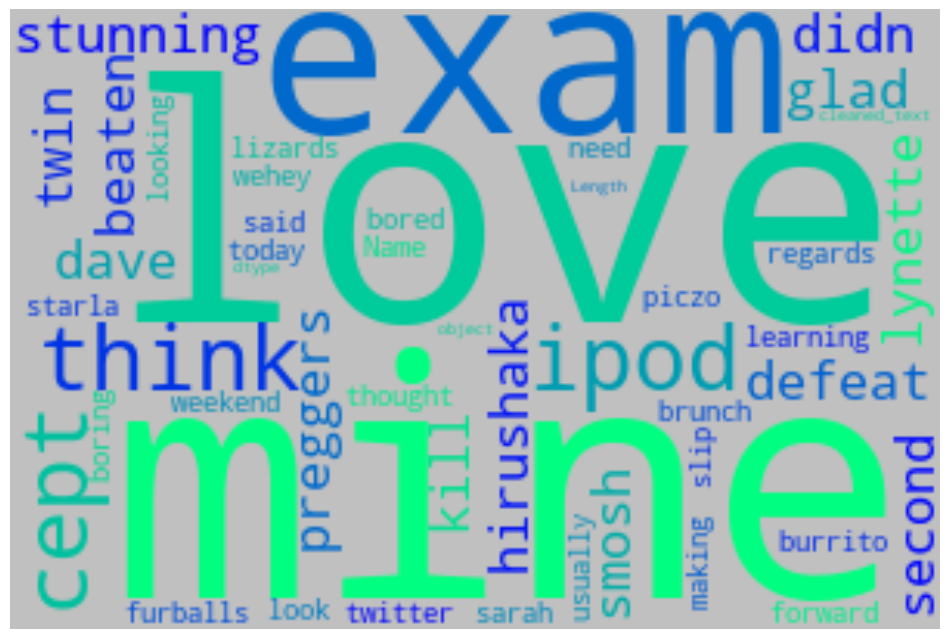

In [23]:
cloud=WordCloud(background_color='silver', colormap="winter", width=300,height=200).generate(str(df["cleaned_text"]))
fig=plt.figure(figsize=(12,9))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear');

In [24]:
stop=stopwords.words('english')
stop.append("also")
df["stop_cleaned_text"]=df["cleaned_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [25]:
from nltk.tokenize import word_tokenize
df["tokenized"]=df["stop_cleaned_text"].apply(lambda x: nltk.word_tokenize(x))

In [26]:
df["tokenized"]

714744     [love, ipod, think, love, mine, cept, youtube,...
605475                 [stunning, defeat, beaten, hirushaka]
992094     [glad, dave, kill, lynette, preggers, twins, w...
271487     [smosh, second, thought, said, burrito, making...
866051                            [learning, piczo, twitter]
                                 ...                        
896256     [starla, regards, furballs, mine, usually, lik...
1412161                                      [look, lizards]
870724     [bored, exam, slip, today, sarah, wehey, need,...
1468545                           [looking, forward, brunch]
9905                                       [boring, weekend]
Name: tokenized, Length: 20000, dtype: object

In [27]:
from nltk.stem import WordNetLemmatizer

In [28]:
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i,pos='v') for i in text]
    return lem_text
df["lemmatized"]=df["tokenized"].apply(lambda x: word_lemmatizer(x))
df["lemmatize_joined"]=df["lemmatized"].apply(lambda x: ' '.join(x))

In [29]:
df["lemmatize_joined"].head()

714744    love ipod think love mine cept youtube still w...
605475                           stun defeat beat hirushaka
992094    glad dave kill lynette preggers twin wait danc...
271487    smosh second think say burrito make movie diss...
866051                                  learn piczo twitter
Name: lemmatize_joined, dtype: object

In [30]:
df["lemmatize_joined"]

714744     love ipod think love mine cept youtube still w...
605475                            stun defeat beat hirushaka
992094     glad dave kill lynette preggers twin wait danc...
271487     smosh second think say burrito make movie diss...
866051                                   learn piczo twitter
                                 ...                        
896256     starla regard furballs mine usually like reall...
1412161                                         look lizards
870724           bore exam slip today sarah wehey need exams
1468545                                  look forward brunch
9905                                            bore weekend
Name: lemmatize_joined, Length: 20000, dtype: object

In [31]:
df_samp = df.sample(10)


In [32]:
for idx, ser in df_samp.iterrows():
    id_prod = f": {ser['index']}\n"
    print( id_prod + ser["lemmatize_joined"]+ "..." +"\n\n")

: 1099757
angus thongs perfect snog...


: 938639
miranda life miranda makati city philippines back school rock icarly...


: 187085
bigbluesteve already happen mark head nightstand...


: 956572
ivybean pleaze tweet back huge twitter peep finland must oldest twitter cool...


: 1456458
enough relax malarkey...


: 633561
get really three...


: 44948
get cold bore wan na play netball...


: 520506
need player...


: 774028
djlegacy cool get ta share miss baby...


: 667778
eat dennys philadelphia...




## word2vec

In [37]:
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings 
warnings.filterwarnings(action='ignore')
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel

In [38]:
dfsamp_vec =df.sample(1000)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
label_encoder = LabelEncoder()

# Fit and transform the 'category' column
dfsamp_vec['target_encod'] = label_encoder.fit_transform(dfsamp_vec['target'])

In [41]:
model1 = gensim.models.Word2Vec(dfsamp_vec.lemmatize_joined, min_count=1,
                                vector_size=100, window=5)

## BERT (Bidirectional Encoder Representations from Transformers)¶

In [45]:
df

,index,target,text,cleaned_text,stop_cleaned_text,tokenized,lemmatized,lemmatize_joined
714744,714744,0,Can you be in love with your ipod? Cuz I think...,love with your ipod think love with mine cept ...,love ipod think love mine cept youtube still w...,"[love, ipod, think, love, mine, cept, youtube,...","[love, ipod, think, love, mine, cept, youtube,...",love ipod think love mine cept youtube still w...
605475,605475,0,Stunning Defeat - I (2245) was beaten by HIRUS...,stunning defeat beaten hirushaka,stunning defeat beaten hirushaka,"[stunning, defeat, beaten, hirushaka]","[stun, defeat, beat, hirushaka]",stun defeat beat hirushaka
992094,992094,1,"So glad Dave didn't kill MJ, Wow! Lynette preg...",glad dave didn kill lynette preggers with twin...,glad dave kill lynette preggers twins wait dan...,"[glad, dave, kill, lynette, preggers, twins, w...","[glad, dave, kill, lynette, preggers, twin, wa...",glad dave kill lynette preggers twin wait danc...
271487,271487,0,@smosh For a second there i thought you said B...,smosh second there thought said burrito making...,smosh second thought said burrito making movie...,"[smosh, second, thought, said, burrito, making...","[smosh, second, think, say, burrito, make, mov...",smosh second think say burrito make movie diss...
866051,866051,1,i am learning with piczo.com and twitter.com,learning with piczo twitter,learning piczo twitter,"[learning, piczo, twitter]","[learn, piczo, twitter]",learn piczo twitter
...,...,...,...,...,...,...,...,...
896256,896256,1,lol @by_starla with regards to the furballs. ...,starla with regards furballs mine usually like...,starla regards furballs mine usually like real...,"[starla, regards, furballs, mine, usually, lik...","[starla, regard, furballs, mine, usually, like...",starla regard furballs mine usually like reall...
1412161,1412161,1,At the zoo to look at lizards.,look lizards,look lizards,"[look, lizards]","[look, lizards]",look lizards
870724,870724,1,"oh im bored, but i got my Tap Exam Slip today,...",bored exam slip today sarah wehey need more exams,bored exam slip today sarah wehey need exams,"[bored, exam, slip, today, sarah, wehey, need,...","[bore, exam, slip, today, sarah, wehey, need, ...",bore exam slip today sarah wehey need exams
1468545,1468545,1,Looking forward to brunch,looking forward brunch,looking forward brunch,"[looking, forward, brunch]","[look, forward, brunch]",look forward brunch


In [46]:
df.shape

(20000, 8)

In [47]:
df_lem_bert = df.sample(2000)

In [48]:
df_lem_bert

,index,target,text,cleaned_text,stop_cleaned_text,tokenized,lemmatized,lemmatize_joined
1370148,1370148,1,I'm guessing @cyclingfansanon is feeling a lit...,guessing cyclingfansanon feeling little extra ...,guessing cyclingfansanon feeling little extra ...,"[guessing, cyclingfansanon, feeling, little, e...","[guess, cyclingfansanon, feel, little, extra, ...",guess cyclingfansanon feel little extra frisky...
606079,606079,0,I had a very bad dream last night.,very dream last night,dream last night,"[dream, last, night]","[dream, last, night]",dream last night
166020,166020,0,@kdc well there go my peace corps prospects.,well there peace corps prospects,well peace corps prospects,"[well, peace, corps, prospects]","[well, peace, corps, prospect]",well peace corps prospect
869050,869050,1,LOL NOW I MADE THIS ACCOUNT WAT DO I DO lol BO...,made this account bored hiiii elen again,made account bored hiiii elen,"[made, account, bored, hiiii, elen]","[make, account, bore, hiiii, elen]",make account bore hiiii elen
1316451,1316451,1,"@jhenvee oooh! what kind? yes, ofcourse ima be...",jhenvee oooh what kind ofcourse there wish kno...,jhenvee oooh kind ofcourse wish know make well...,"[jhenvee, oooh, kind, ofcourse, wish, know, ma...","[jhenvee, oooh, kind, ofcourse, wish, know, ma...",jhenvee oooh kind ofcourse wish know make well...
...,...,...,...,...,...,...,...,...
1485915,1485915,1,Looking good for keeping out the BNP in NW #eu09,looking good keeping,looking good keeping,"[looking, good, keeping]","[look, good, keep]",look good keep
904611,904611,1,omg supernatural is on after good news week,supernatural after good news week,supernatural good news week,"[supernatural, good, news, week]","[supernatural, good, news, week]",supernatural good news week
867825,867825,1,just had a very nice dinner at xin wang with m...,just very nice dinner wang with dear family ce...,nice dinner wang dear family celebrate bday,"[nice, dinner, wang, dear, family, celebrate, ...","[nice, dinner, wang, dear, family, celebrate, ...",nice dinner wang dear family celebrate bday
971366,971366,1,"http://twitpic.com/5envv - Ohh yaa man ,, It's...",http twitpic envv suummer quebbec speak french,http twitpic envv suummer quebbec speak french,"[http, twitpic, envv, suummer, quebbec, speak,...","[http, twitpic, envv, suummer, quebbec, speak,...",http twitpic envv suummer quebbec speak french


In [49]:
import torch
from transformers import BertTokenizer, BertModel

In [50]:
# Setting the device to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Loading the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Setting the model to evaluation mode
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [51]:
# Fonction pour encoder le texte à l'aide du tokenizer
def get_bert_embeddings(text):
    encoded_input = tokenizer(text, padding = True, truncation = True, return_tensors = 'pt')
    input_ids = encoded_input['input_ids'].to(device)
    attention_mask = encoded_input['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask = attention_mask)
        
    # Calculating the mean embedding of the last hidden state
    embeddings = outputs.last_hidden_state.mean(dim = 1)
    
    # Converting the embeddings to a list and return
    return embeddings.tolist()[0]

In [52]:
# Applying the function to the lemmatized text
df_bert = df_lem_bert['lemmatize_joined'].apply(get_bert_embeddings)

In [53]:
df_bert_fin = pd.DataFrame(df_bert)

In [54]:
df_bert_fin.head()

,lemmatize_joined
1370148,"[0.03950053080916405, -0.2665681838989258, 0.6..."
606079,"[0.30222830176353455, -0.4306241571903229, 0.3..."
166020,"[0.22930948436260223, 0.03237859532237053, -0...."
869050,"[0.05824290215969086, 0.1249835193157196, 0.18..."
1316451,"[-0.1750033050775528, 0.18008284270763397, 0.6..."


In [55]:
# Transforming to a list
df_bert_list = pd.DataFrame(df_bert_fin['lemmatize_joined'].to_list())

# Splitting the values within the columns using comma delimiter
df_bert_conc = pd.concat([df_bert_list[col].astype(str).str.split(',', expand=True) for col in df_bert_list.columns], axis=1)

# Renaming columns starting from 0
df_bert_conc.columns = [str(i) for i in range(len(df_bert_conc.columns))]

# Displaying the resulting DataFrame with separate columns
df_bert_conc

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.03950053080916405,-0.2665681838989258,0.66170334815979,0.08908633887767792,0.035370271652936935,-0.031025845557451248,0.2766518294811249,0.18902702629566193,-0.17754150927066803,-0.15181082487106323,...,0.010125730186700821,-0.04450138658285141,-0.032056596130132675,-0.21449948847293854,0.030510399490594864,0.20952357351779938,-0.23981724679470062,-0.12861832976341248,-0.1173086166381836,0.12213266640901566
1,0.30222830176353455,-0.4306241571903229,0.37565022706985474,0.00347331166267395,-0.15570911765098572,-0.5526053309440613,0.1766146719455719,0.526577353477478,0.040775932371616364,-0.4514384865760803,...,0.09801328182220459,0.10386469215154648,0.5544208288192749,-0.7113872766494751,0.34283843636512756,0.46593135595321655,0.18339817225933075,-0.36462047696113586,-0.0875949114561081,-0.4967438578605652
2,0.22930948436260223,0.03237859532237053,-0.15993253886699677,-0.03081248141825199,0.1418416053056717,-0.24415190517902374,0.39405810832977295,0.05126577615737915,-0.5205243825912476,-0.06873328238725662,...,0.27127036452293396,-0.38684403896331787,0.011665304191410542,-0.2588164806365967,0.26396387815475464,0.035158395767211914,-0.15213468670845032,0.1819874495267868,-0.05009770393371582,-0.112678162753582
3,0.05824290215969086,0.1249835193157196,0.18403805792331696,-0.4307049810886383,-0.047836657613515854,-0.16591058671474457,0.0552452951669693,0.15743614733219147,0.011461423709988594,-0.40326055884361267,...,0.30203044414520264,-0.3434187173843384,-0.1404007524251938,0.07142281532287598,0.038901589810848236,0.2328217774629593,-0.14596329629421234,-0.06988591700792313,0.1375892013311386,0.13309718668460846
4,-0.1750033050775528,0.18008284270763397,0.6812730431556702,-0.10987941920757294,0.3485897183418274,-0.4773307740688324,0.26190435886383057,0.3064843714237213,-0.0625913143157959,-0.31829509139060974,...,-0.16039757430553436,-0.725387692451477,-0.15325164794921875,-0.09606228023767471,-0.35130688548088074,0.13029024004936218,0.04910476505756378,-0.3174324631690979,0.014977000653743744,0.2818079888820648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.42699018120765686,-0.27448081970214844,-0.028633862733840942,-0.06629295647144318,0.3499208390712738,-0.1363414227962494,0.22325968742370605,0.16749045252799988,0.19906523823738098,-0.41925424337387085,...,0.13106361031532288,-0.2142440527677536,0.18022248148918152,-0.2807433307170868,-0.17721278965473175,0.11549307405948639,-0.19910497963428497,-0.12000767886638641,-0.2894676923751831,-0.4617304801940918
1996,0.34699949622154236,-0.30587849020957947,0.029126614332199097,0.052811622619628906,0.18517418205738068,-0.5496090054512024,0.7347576022148132,0.6692371368408203,-0.1801333874464035,-0.40333035588264465,...,0.020688071846961975,-0.014041237533092499,0.13332553207874298,-0.36967453360557556,-0.14582736790180206,0.06729588657617569,-0.02804393321275711,-0.023054027929902077,0.1820722371339798,-0.3951553404331207
1997,0.1655435860157013,-0.11037617921829224,0.8183673620223999,-0.3182448744773865,-0.22447554767131805,-0.32056838274002075,0.3084529936313629,0.5728680491447449,-0.12666946649551392,-0.2878855764865875,...,-0.04213627800345421,-0.10337531566619873,0.0848296657204628,0.018459612503647804,-0.08052308857440948,0.06467324495315552,0.12574881315231323,-0.38483333587646484,-0.14196941256523132,-0.20868965983390808
1998,0.02011346071958542,0.004686082247644663,0.15318942070007324,-0.2620755732059479,0.06024548038840294,-0.17110329866409302,0.3111446797847748,0.5541794300079346,-0.11116001009941101,-0.3549443185329437,...,0.21442797780036926,-0.21548601984977722,-0.18513363599777222,-0.6444903016090393,0.06221739575266838,0.18941837549209595,-0.20596426725387573,-0.14212331175804138,0.16037391126155853,0.3122631311416626


In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score

In [57]:
# Defining the t-SNE 
n_components = 2
tsne = TSNE(n_components = n_components)

# Fitting to the df_tfidf
tsne_result_bert = tsne.fit_transform(df_bert_conc)

# Creating a new df for the results
df_tsne_bert = pd.DataFrame(data = tsne_result_bert, columns = ["TSNE{}".format(i+1) for i in range(n_components)])

In [58]:
label_encoder = LabelEncoder()

# Fit and transform the 'category' column
df_lem_bert['Target_encod'] = label_encoder.fit_transform(df_lem_bert['target'])

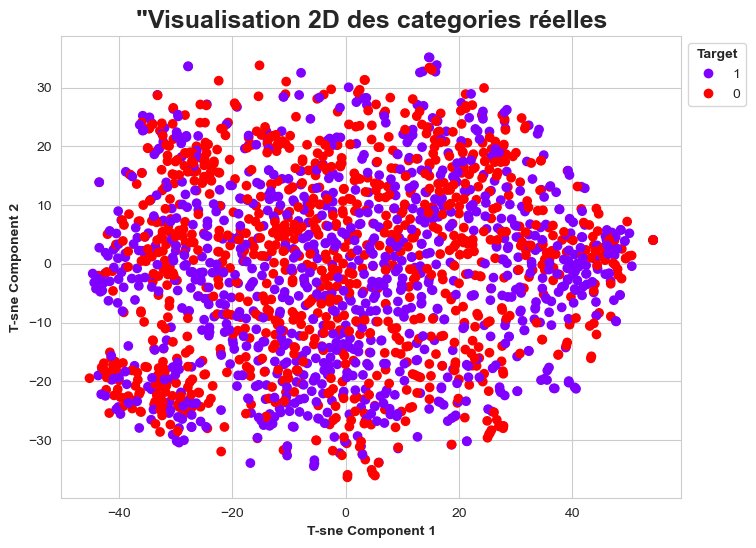

In [59]:
# Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(df_tsne_bert['TSNE1'], df_tsne_bert['TSNE2'], c=df_lem_bert['Target_encod'], cmap='rainbow')

# Adding a legend based on the 'category' column
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, df_lem_bert['Target_encod'].unique(), title='Target', bbox_to_anchor=(1,1), loc='upper left')
legend.get_title().set_fontweight('bold')

# Adding details 
plt.xlabel('T-sne Component 1', fontweight = 'bold')
plt.ylabel('T-sne Component 2', fontweight = 'bold')
plt.title('"Visualisation 2D des categories réelles', fontweight ='bold', fontsize=18)
plt.show()

In [60]:
# NLP
import nltk
nltk.download('wordnet')
import re
from textblob import TextBlob
from sklearn.feature_extraction import text
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Machine Learning
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [61]:
# Getting a count of words from the documents
# Ngram_range is set to 1,2 - meaning either single or two word combination will be extracted
tokenizer = TweetTokenizer()

cvec = CountVectorizer(ngram_range=(1,2), tokenizer=tokenizer.tokenize)
full_text = list(df["lemmatize_joined"].values)
cvec.fit(full_text)

# Getting the total n-gram count
len(cvec.vocabulary_)

111023

In [62]:
train_vectorized = cvec.transform(df["lemmatize_joined"])

# Getting the matrix shape
print('sparse matrix shape:', train_vectorized.shape)

# Getting the nonzero count
print('nonzero count:', train_vectorized.nnz)

# Getting sparsity %
print('sparsity: %.2f%%' % (100.0 * train_vectorized.nnz / (train_vectorized.shape[0] * train_vectorized.shape[1])))

sparse matrix shape: (20000, 111023)
nonzero count: 226617
sparsity: 0.01%


In [63]:
test_vectorized = cvec.transform(df["lemmatize_joined"])

# Getting the matrix shape
print('sparse matrix shape:', test_vectorized.shape)

# Getting the nonzero count
print('nonzero count:', test_vectorized.nnz)

# Getting sparsity %
print('sparsity: %.2f%%' % (100.0 * test_vectorized.nnz / (test_vectorized.shape[0] * test_vectorized.shape[1])))

sparse matrix shape: (20000, 111023)
nonzero count: 226617
sparsity: 0.01%


In [64]:
test_vectorized 

<20000x111023 sparse matrix of type '<class 'numpy.int64'>'
	with 226617 stored elements in Compressed Sparse Row format>

In [65]:
transformer = TfidfTransformer()

# Fitting and transforming n-grams
train_tdidf = transformer.fit_transform(train_vectorized)
test_tdidf = transformer.fit_transform(test_vectorized)

In [66]:
# Create X & y variables for Machine Learning
X_train = train_tdidf
y_train = df['target']

X_test = test_tdidf

In [67]:
def model(mod, model_name, X_train, y_train):
    
    # Fitting model
    mod.fit(X_train, y_train)
    
    # Print model name
    print(model_name)
    
    # Compute 5-fold cross validation: Accuracy
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 5)

    # Compute 5-fold prediction on training set
    predictions = cross_val_predict(mod, X_train, y_train, cv = 5)

    # Return accuracy score to 3dp
    print("Accuracy:", round(acc.mean(), 3))
 
    # Compute confusion matrix
    cm = confusion_matrix(predictions, y_train)
    
    # Print confusion matrix
    print("Confusion Matrix:  \n", cm)

    # Print classification report
    print("Classification Report \n", classification_report(predictions, y_train))

In [68]:
# Logistic Regression
log = LogisticRegression(multi_class='ovr')
model(log, "Logistic Regression", X_train, y_train)

Logistic Regression
Accuracy: 0.723
Confusion Matrix:  
 [[6659 2336]
 [3200 7805]]
Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.74      0.71      8995
           1       0.77      0.71      0.74     11005

    accuracy                           0.72     20000
   macro avg       0.72      0.72      0.72     20000
weighted avg       0.73      0.72      0.72     20000



                               -----------------------------------------------------

## Deep Learning

In [69]:
import keras.preprocessing.sequence 
from keras.utils import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras import layers

In [70]:
X = df["lemmatize_joined"]
y = df['target']

In [71]:
from sklearn.model_selection import train_test_split
review = df['lemmatize_joined'].values
label = df['target'].values
review_train, review_test, label_train, label_test = train_test_split(
review, label, test_size=0.25, random_state=1000) 

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
review_vectorizer = CountVectorizer()
review_vectorizer.fit(review_train)
Xlr_train = review_vectorizer.transform(review_train)
Xlr_test  = review_vectorizer.transform(review_test)
Xlr_train 

<15000x19835 sparse matrix of type '<class 'numpy.int64'>'
	with 91279 stored elements in Compressed Sparse Row format>

# 1er modele

In [73]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(review_train)
Xcnn_train = tokenizer.texts_to_sequences(review_train)
Xcnn_test = tokenizer.texts_to_sequences(review_test)
vocab_size = len(tokenizer.word_index) + 1  
print(review_train[1])
print(Xcnn_train[1]) 

really want make break guess brodcasted sweden
[18, 15, 14, 100, 130, 1910]


In [74]:
review_train

array(['pool', 'really want make break guess brodcasted sweden',
       'early bike ride lay tan', ..., 'sarajchipps blue jays',
       'spryken munyew long windows replace try familize',
       'amarcg great good hear good hear take advice watch twutorial http wnxs hint upload'],
      dtype=object)

In [75]:
Xcnn_train

[[485],
 [18, 15, 14, 100, 130, 1910],
 [124, 454, 355, 686, 2230],
 [1111, 3571, 381, 14, 687, 891, 17],
 [519, 319, 1481, 162, 440, 10, 64, 259, 944],
 [6, 47, 2737, 102, 425, 945, 552, 946, 1911],
 [34, 9, 119, 19],
 [51, 73, 12, 54, 124, 727],
 [2231],
 [49, 29, 160, 1676, 191, 1677, 3572, 455, 127],
 [892, 24, 103, 40],
 [348, 72],
 [131, 18],
 [1912, 88, 441, 61],
 [6, 47, 1220, 2232, 5, 204],
 [520, 55, 1678, 51, 7, 20],
 [78, 58, 64, 41, 306, 463, 3573, 50, 1910],
 [15, 598, 1679, 1112, 2738, 1113, 1680, 1344],
 [70, 3574, 271, 165, 59, 97, 1, 688, 486, 28, 155, 1114, 1221],
 [128],
 [134, 43, 2233, 67, 146, 17, 247, 235, 288, 95, 1482],
 [80, 27, 63, 172],
 [53, 71, 394, 768, 28, 769, 3575],
 [17, 55],
 [49, 8, 185, 8, 32, 272, 106, 567, 112],
 [],
 [1483, 171],
 [1037, 49, 34, 52, 21, 660, 534, 1484],
 [42, 18, 1222, 1345, 553],
 [46, 1223, 35, 1, 39, 947],
 [14, 108, 409],
 [45, 23, 122, 38, 259, 188],
 [505, 88, 4, 1038, 109],
 [72, 74, 23, 201, 48, 63, 1485, 1486],
 [273, 

### Ici, nous pouvons voir que les mots les plus courants n'ont pas un grand index dans notre espace d'intégration. Néanmoins, les mots extrêmement rares obtiendront une valeur d'index plus élevée qui sera le nombre de mots + 1 car ils contiennent certaines informations. Ceux dont l’occurrence est modérée se verront attribuer une valeur d’indice modérée. Enfin, la valeur 0 est réservée et ne sera fournie à aucun texte.

### Un problème est que dans chaque séquence il y a une longueur de mots différente, et pour spécifier la longueur de la séquence de mots, nous devons fournir un paramètre mexlen et pour résoudre ce problème, nous devons utiliser pad_sequence(), qui complète simplement la séquence de mots. avec des zéros.

In [76]:
maxlen = 100
Xcnn_train = pad_sequences(Xcnn_train, padding='post', maxlen=maxlen)
Xcnn_test = pad_sequences(Xcnn_test, padding='post', maxlen=maxlen)
print(Xcnn_train[0, :]) 

[485   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


### Après le remplissage, nous avons ajouté une valeur nulle aux matrices et nous pouvons désormais les utiliser dans un modèle d'apprentissage en profondeur. C’est ainsi que l’incorporation de mots établit des relations entre les mots. Dans la prochaine étape, nous essaierons d'adapter le modèle TextCNN.

### Tout d’abord, nous devons importer des séquentiels et des calques.

In [77]:
# Créer des modèles en utilisant des calques
embedding_dim = 200
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))               
textcnnmodel.add(layers.Conv1D(128, 5, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Dense(10, activation='relu'))
textcnnmodel.add(layers.Dense(1, activation='sigmoid'))
textcnnmodel.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary() 



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 200)          3967200   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           128128    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4,096,629
Trainable params: 4,096,629
Non-trainable params: 0
______________________________________________

In [78]:
# Ajustons le modèle et vérifions l'exactitude
textcnnmodel.fit(Xcnn_train, label_train,
                     epochs=6,
                     verbose=True,
                     validation_data=(Xcnn_test, label_test),
                     batch_size=10)

Epoch 1/6
1500/1500 [==============================] - 166s 110ms/step - loss: 0.5909 - accuracy: 0.6755 - val_loss: 0.5557 - val_accuracy: 0.7056
Epoch 2/6
1500/1500 [==============================] - 179s 119ms/step - loss: 0.4512 - accuracy: 0.7869 - val_loss: 0.5645 - val_accuracy: 0.7136
Epoch 3/6
1500/1500 [==============================] - 191s 127ms/step - loss: 0.2886 - accuracy: 0.8728 - val_loss: 0.7259 - val_accuracy: 0.6976
Epoch 4/6
1500/1500 [==============================] - 176s 117ms/step - loss: 0.1606 - accuracy: 0.9297 - val_loss: 1.0279 - val_accuracy: 0.6866
Epoch 5/6
1500/1500 [==============================] - 167s 112ms/step - loss: 0.1075 - accuracy: 0.9530 - val_loss: 1.3414 - val_accuracy: 0.6704
Epoch 6/6
1500/1500 [==============================] - 207s 138ms/step - loss: 0.0858 - accuracy: 0.9602 - val_loss: 1.4209 - val_accuracy: 0.6726


In [79]:
loss, accuracy = textcnnmodel.evaluate(Xcnn_train, label_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(Xcnn_test, label_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))


469/469 [==============================] - 41s 85ms/step - loss: 0.0622 - accuracy: 0.9728
Training Accuracy: 0.9728
157/157 [==============================] - 13s 79ms/step - loss: 1.4209 - accuracy: 0.6726
Testing Accuracy:  0.6726


# 2° modele

In [80]:
num_words=5000
top_words = 7000
embedding_dim = 200

In [81]:
from keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import MaxPooling1D, MaxPooling2D, Flatten, Dense

In [82]:
from keras.layers import Embedding

max_words = 450
model = Sequential()      # initilaizing the Sequential nature for CNN model
# Ajout de la couche d'intégration qui prendra un maximum de 450 mots en entrée et fournira une sortie en 32 dimensions de ces mots qui appartiennent au dictionnaire top_words
model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [83]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 200)          3967200   
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 32)           19232     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 250)               400250    
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                      

In [84]:
model.fit(Xcnn_train, label_train,
                     epochs=6,
                     verbose=True,
                     validation_data=(Xcnn_test, label_test),
                     batch_size=10)

Epoch 1/6
1500/1500 [==============================] - 153s 100ms/step - loss: 0.5845 - accuracy: 0.6857 - val_loss: 0.5542 - val_accuracy: 0.7244
Epoch 2/6
1500/1500 [==============================] - 138s 92ms/step - loss: 0.4375 - accuracy: 0.7957 - val_loss: 0.5999 - val_accuracy: 0.6988
Epoch 3/6
1500/1500 [==============================] - 134s 89ms/step - loss: 0.2712 - accuracy: 0.8803 - val_loss: 0.7669 - val_accuracy: 0.6832
Epoch 4/6
1500/1500 [==============================] - 146s 98ms/step - loss: 0.1482 - accuracy: 0.9358 - val_loss: 1.0149 - val_accuracy: 0.6746
Epoch 5/6
1500/1500 [==============================] - 136s 91ms/step - loss: 0.1014 - accuracy: 0.9569 - val_loss: 1.3848 - val_accuracy: 0.6580
Epoch 6/6
1500/1500 [==============================] - 131s 87ms/step - loss: 0.0807 - accuracy: 0.9639 - val_loss: 1.6358 - val_accuracy: 0.6696


In [85]:
loss, accuracy = model.evaluate(Xcnn_train, label_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(Xcnn_test, label_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

469/469 [==============================] - 6s 12ms/step - loss: 0.0646 - accuracy: 0.9701
Training Accuracy: 0.9701
157/157 [==============================] - 2s 11ms/step - loss: 1.6358 - accuracy: 0.6696
Testing Accuracy:  0.6696


# 3° Modele

In [86]:
from tensorflow.keras.layers import GlobalMaxPooling1D

In [87]:
maxlen = 100
model0 = Sequential([
    Embedding(vocab_size, 8, input_length=maxlen),
   Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
  Dense(10, activation='relu'),
  Dense(1, activation='sigmoid')
])

In [88]:
model0.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model0.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 8)            158688    
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 128)           5248      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 165,237
Trainable params: 165,237
Non-trainable params: 0
________________________________________________

In [89]:
history = model0.fit(Xcnn_train, label_train,
                     epochs=6,
                     verbose=True,
                     validation_data=(Xcnn_test, label_test),
                     batch_size=10)

Epoch 1/6
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5993 - acc: 0.6713 - val_loss: 0.5607 - val_acc: 0.7160
Epoch 2/6
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4889 - acc: 0.7665 - val_loss: 0.5509 - val_acc: 0.7176
Epoch 3/6
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4192 - acc: 0.8140 - val_loss: 0.5828 - val_acc: 0.7052
Epoch 4/6
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3486 - acc: 0.8505 - val_loss: 0.6584 - val_acc: 0.6966
Epoch 5/6
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2792 - acc: 0.8847 - val_loss: 0.7481 - val_acc: 0.6926
Epoch 6/6
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2204 - acc: 0.9123 - val_loss: 0.8448 - val_acc: 0.6788


In [90]:
loss, accuracy = model0.evaluate(Xcnn_test, label_test)
print('Testing Accuracy is {} '.format(accuracy*100))

157/157 [==============================] - 1s 4ms/step - loss: 0.8448 - acc: 0.6788
Testing Accuracy is 67.87999868392944 


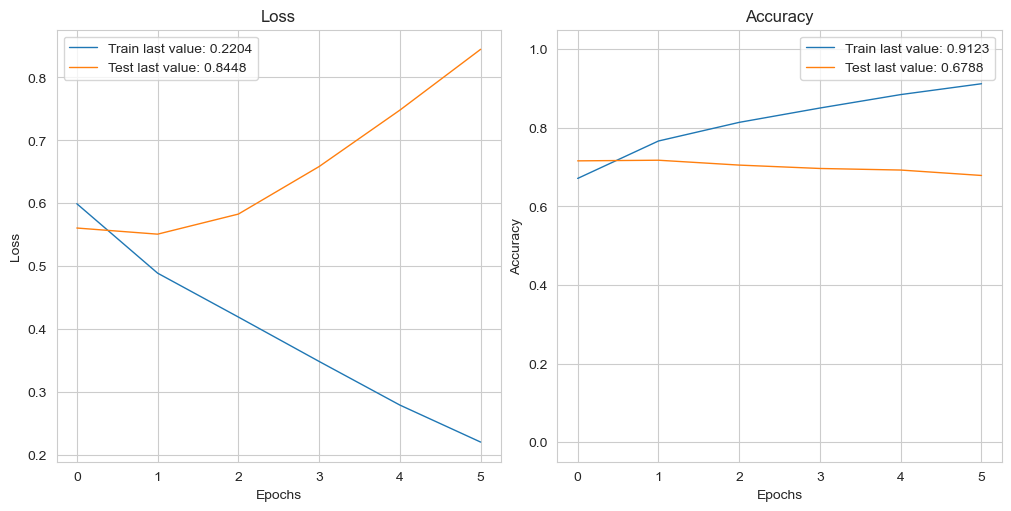

In [91]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt
show_history(history)
#plot_history(history, path="standard.png")
plt.close()

# 4° Modele

In [92]:
X = df["lemmatize_joined"]
y = df['target']

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y , test_size = 0.20)

In [94]:
from tensorflow.keras.preprocessing.text import Tokenizer
vocab_size = 5000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [95]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [96]:
max_length = 100
padding_type = "post"
trunction_type="post"
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type,
                       truncating=trunction_type)
X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length,
                               padding=padding_type, truncating=trunction_type)

In [97]:
labels = df['target']
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(df["lemmatize_joined"])
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(df["lemmatize_joined"])
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[5, 391, 10, 5, 195, 6688, 380, 21, 441, 3], [2759, 4347, 516, 6689], [143, 920, 256, 6690, 6691, 838, 39, 276, 395, 1151, 517, 3352], [6692, 309, 10, 64, 4348, 14, 149, 4349], [302, 6693, 29], [2056, 212], [577, 3353, 371, 371, 1400, 1518], [6694, 210], [48, 155, 6695, 1830, 5, 235, 6696, 6697, 5, 351], [6698, 3354, 76, 1831, 31, 64, 3355, 2350], [94, 773, 20, 5], [6699, 740, 975, 975, 715], [6700, 337], [413], [6701, 10, 2, 256, 57, 13, 396], [518, 6702, 313, 343], [6703, 290, 1], [921, 545, 2760, 546, 177, 1084, 19, 578], [374, 4350, 14, 689], [6704, 6705, 140, 976, 352, 34, 80, 2, 562, 226, 150, 1401], [2760, 6706], [6707, 83, 4351, 3356], [6708, 6709, 27], [9, 65, 6710, 6711, 6712, 2761, 2057, 6713, 197, 170, 65], [6714, 71, 432, 22, 1648, 294, 381, 13], [6, 54, 6715, 6716, 433, 322, 27, 20, 6717, 295, 1519, 471, 2058], [6718], [338, 2351, 6719, 207, 77], [28, 3357, 1832, 6720, 28, 56, 838, 800], [251, 609, 10, 2352, 129, 141, 6721, 6722, 1833, 593, 2059], [6723, 12, 18, 16, 6724

In [98]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400001 word vectors.


In [99]:
embeddings_index.get("paper")

array([-0.85034  ,  0.33358  , -0.65889  , -0.49871  ,  0.36585  ,
       -0.19245  ,  0.25658  , -0.053408 ,  0.31474  ,  0.2443   ,
        0.29337  , -0.44917  ,  0.15175  ,  0.39314  , -0.31786  ,
        0.060525 ,  0.81775  , -0.38847  ,  0.76761  , -1.1041   ,
       -0.1544   ,  0.31655  , -0.37238  , -0.11485  ,  0.51635  ,
       -0.39289  ,  0.16301  , -0.2532   , -0.50976  ,  0.15201  ,
        0.27808  ,  0.52522  , -0.38815  , -0.3472   , -0.61818  ,
        0.17022  ,  0.12251  , -0.24191  , -0.38877  , -0.53176  ,
       -0.46987  , -0.70502  , -0.62126  , -0.38689  , -0.85637  ,
       -0.41003  , -0.47487  , -0.21083  , -0.81338  , -0.52398  ,
        0.49894  ,  0.37909  ,  0.55428  ,  1.123    , -0.42121  ,
       -1.5674   , -0.56892  ,  0.40819  ,  1.7949   ,  0.16856  ,
       -0.0029332,  0.28786  , -0.90088  , -0.094214 ,  0.79993  ,
       -0.39096  ,  0.76286  ,  0.71307  ,  0.13194  , -0.40756  ,
       -0.18687  ,  0.89562  ,  0.46867  , -0.0028801,  0.0253

### Utilisation de GloVe (intégrations de mots pré-entraînées)

In [100]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [101]:
embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=100,
                            weights=[embedding_matrix],
                            input_length=100,
                            trainable=False)

In [104]:
model_c = Sequential([
    embedding_layer,
  Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
  Dense(10, activation='relu'),
  Dense(1, activation='sigmoid')
])

In [105]:
model_c.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [106]:
history = model_c.fit(X_train_padded, y_train, epochs=6, validation_data=(X_test_padded, y_test))

Epoch 1/6
500/500 [==============================] - 29s 56ms/step - loss: 0.6614 - accuracy: 0.5984 - val_loss: 0.6351 - val_accuracy: 0.6190
Epoch 2/6
500/500 [==============================] - 28s 57ms/step - loss: 0.6017 - accuracy: 0.6670 - val_loss: 0.6133 - val_accuracy: 0.6492
Epoch 3/6
500/500 [==============================] - 28s 55ms/step - loss: 0.5377 - accuracy: 0.7246 - val_loss: 0.6171 - val_accuracy: 0.6683
Epoch 4/6
500/500 [==============================] - 32s 63ms/step - loss: 0.4527 - accuracy: 0.7869 - val_loss: 0.7091 - val_accuracy: 0.6245
Epoch 5/6
500/500 [==============================] - 33s 67ms/step - loss: 0.3767 - accuracy: 0.8284 - val_loss: 0.7774 - val_accuracy: 0.6258
Epoch 6/6
500/500 [==============================] - 36s 71ms/step - loss: 0.2920 - accuracy: 0.8731 - val_loss: 0.7714 - val_accuracy: 0.6465


In [107]:
loss, accuracy = model_c.evaluate(X_test_padded,y_test)
print('Testing Accuracy is {} '.format(accuracy*100))

125/125 [==============================] - 3s 22ms/step - loss: 0.7714 - accuracy: 0.6465
Testing Accuracy is 64.64999914169312 


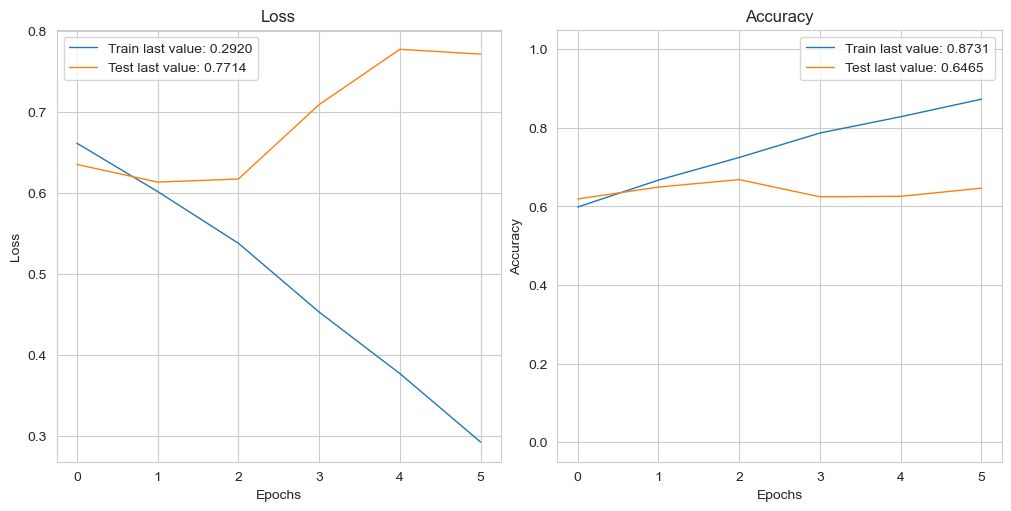

In [108]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history)
plot_history(history, path="standard.png")
plt.close()

### Optimisation des hyperparamètres
### Définir le modèle à optimiser
#### Le moyen le plus simple d'effectuer une optimisation dans TensorFlow consiste à utiliser un wrapper Scikit-learn qui nous permet d'appliquer la recherche de grille à un réseau de neurones. Ce wrapper attend une définition de fonction de modèle. Commençons par créer cette fonction. 


In [109]:
def model_to_optimize(num_filters, kernel_size):
    model = Sequential([
    embedding_layer,
    Conv1D(num_filters, kernel_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

### Création de la grille des paramètres

In [110]:
params = {
    "num_filters":[32, 64, 128],
    "kernel_size":[3, 5, 7],
}

In [111]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=model_to_optimize,
                            epochs=10,
                           batch_size=10,
                            verbose=False)

In [152]:
test_accuracy = search.score(X_test_padded, y_test)

In [153]:
test_accuracy

0.6552500128746033

#### Meilleure combinaison de paramètres.

In [154]:
search.best_params_

{'kernel_size': 3, 'num_filters': 128}

#### Vérifier les résultats de validation croisée

In [155]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel_size,param_num_filters,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,81.176852,15.476842,1.708973,0.659893,3,32,"{'kernel_size': 3, 'num_filters': 32}",0.632500,0.645000,0.633750,0.646563,0.637812,0.639125,0.005733,3
1,110.161627,9.297782,1.630469,0.274062,3,64,"{'kernel_size': 3, 'num_filters': 64}",0.634687,0.649375,0.638125,0.648750,0.634063,0.641000,0.006730,2
2,162.955177,6.820100,1.764737,0.245061,3,128,"{'kernel_size': 3, 'num_filters': 128}",0.645938,0.641250,0.650000,0.652188,0.627500,0.643375,0.008771,1
3,104.581936,7.414876,1.466895,0.559351,5,32,"{'kernel_size': 5, 'num_filters': 32}",0.624687,0.625313,0.619375,0.634375,0.632500,0.627250,0.005489,5
4,138.258660,5.306891,2.023928,0.646574,5,64,"{'kernel_size': 5, 'num_filters': 64}",0.625938,0.621875,0.631250,0.633750,0.623750,0.627313,0.004497,4
5,243.028970,20.923999,2.887011,0.281045,5,128,"{'kernel_size': 5, 'num_filters': 128}",0.627813,0.629375,0.616875,0.637187,0.624375,0.627125,0.006624,7
6,141.631178,8.189261,1.783520,0.298749,7,32,"{'kernel_size': 7, 'num_filters': 32}",0.621250,0.615000,0.617188,0.613437,0.622187,0.617812,0.003418,9
7,188.496178,6.500654,2.185069,0.267289,7,64,"{'kernel_size': 7, 'num_filters': 64}",0.635625,0.629375,0.629062,0.614688,0.614688,0.624687,0.008494,8
8,332.825268,37.688968,4.647752,0.933006,7,128,"{'kernel_size': 7, 'num_filters': 128}",0.609375,0.627187,0.630938,0.628125,0.640000,0.627125,0.009964,6


### Qu'est-ce qu'une plateforme MLOps ?
### Une plateforme MLOps offre aux data scientists et aux ingénieurs logiciels un environnement de collaboration qui facilite l'exploration des données par itération, offre des capacités de collaboration en temps réel à des fins de suivi expérimental, d'ingénierie de fonctionnalités et de gestion de modèles. Elle permet également de contrôler la transition, le déploiement et la surveillance des modèles. Une plateforme MLOps automatise les aspects opérationnels et de synchronisation du cycle de vie du machine learning.

## Les grands principes du MLOps
### En se concentrant sur les spécificités inhérentes au MLOps par-dessus les principes DevOps, nous pouvons référencer 5 piliers fondamentaux :
- reproductibilité, 
- déploiement,
- monitoring, 
- gestion du cycle de vie 
- gouvernance.

##### Conclusion : Le MLOps n’est pas qu’une histoire d’outils, ce sont avant tout des comportements